<a href="https://colab.research.google.com/github/syedabusafwan/ML-practice/blob/main/Clustering_%26_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Dataset and Libraries**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading Iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **KMean Clustering**

In [3]:
# Applying K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

df["Cluster"] = clusters


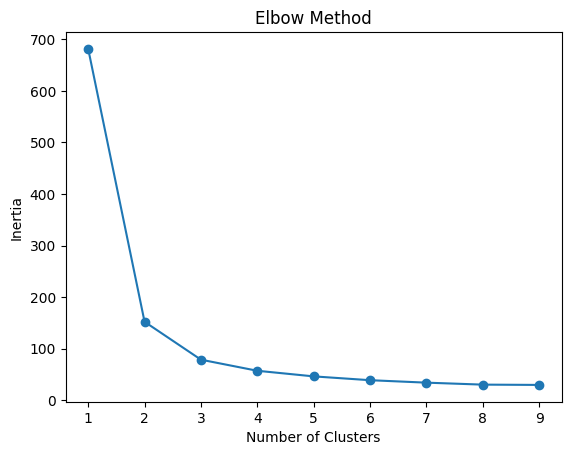

In [4]:
inertia = []

for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

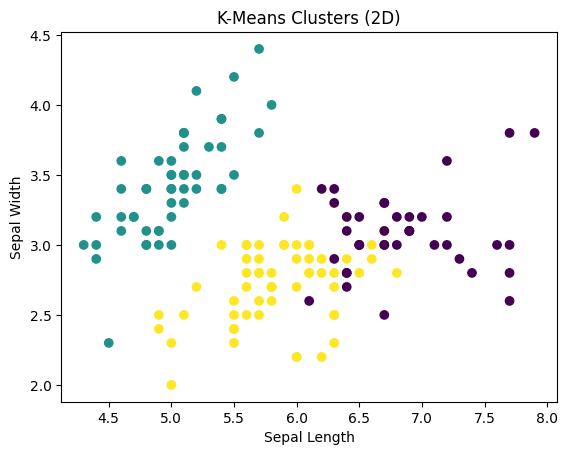

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clusters (2D)")
plt.show()

In [6]:
# Checking cluster composition using true labels
df["Species"] = iris.target
pd.crosstab(df["Cluster"], df["Species"])

Species,0,1,2
Cluster,,,
0,0,3,36
1,50,0,0
2,0,47,14


# **PCA**

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

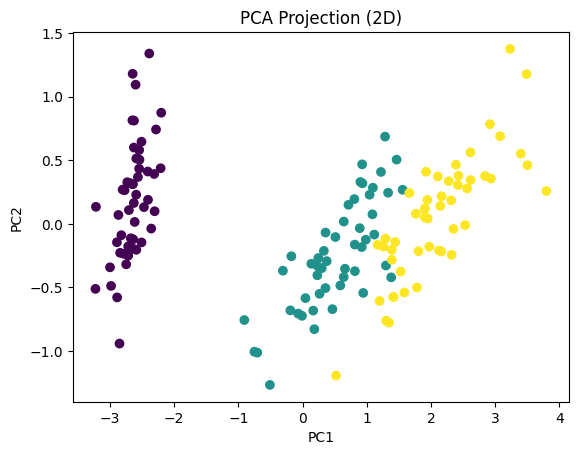

In [8]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=iris.target, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (2D)")
plt.show()

In [10]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

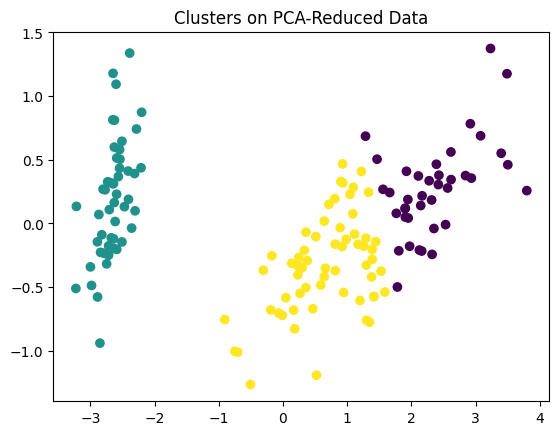

In [11]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_pca, cmap='viridis')
plt.title("Clusters on PCA-Reduced Data")
plt.show()

# **Hierarchical Clustering & Dendrogram**

In [12]:
linked = linkage(X, method='ward')

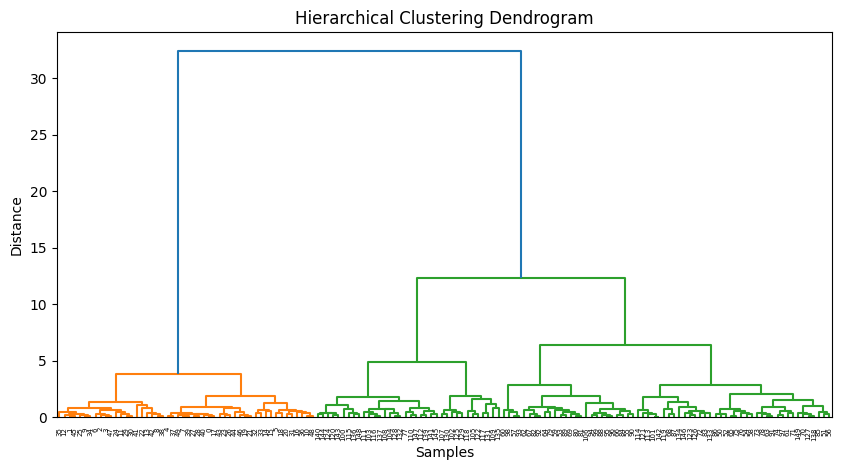

In [13]:
plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

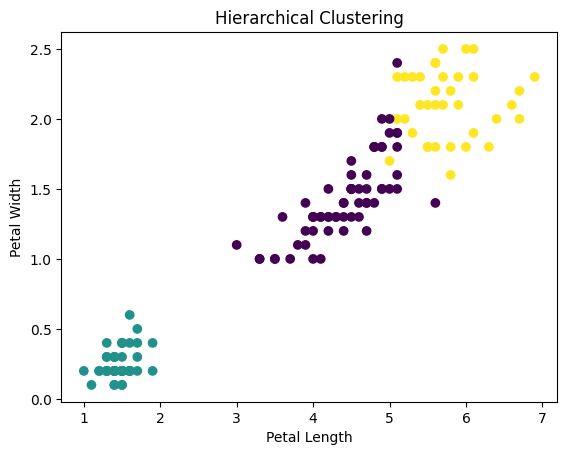

In [14]:
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(X)

plt.scatter(X[:, 2], X[:, 3], c=hc_labels, cmap='viridis')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Hierarchical Clustering")
plt.show()

# **DBSCAN**

In [18]:
# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Adding labels to dataframe
df["DBSCAN_Cluster"] = db_labels

In [20]:
for eps in [0.3, 0.5, 0.7, 1.0]:
    model = DBSCAN(eps=eps, min_samples=5)
    labels = model.fit_predict(X_scaled)
    print(f"eps={eps} → clusters:", len(set(labels)) - (1 if -1 in labels else 0),
          ", noise points:", list(labels).count(-1))

eps=0.3 → clusters: 3 , noise points: 120
eps=0.5 → clusters: 2 , noise points: 34
eps=0.7 → clusters: 2 , noise points: 6
eps=1.0 → clusters: 2 , noise points: 3


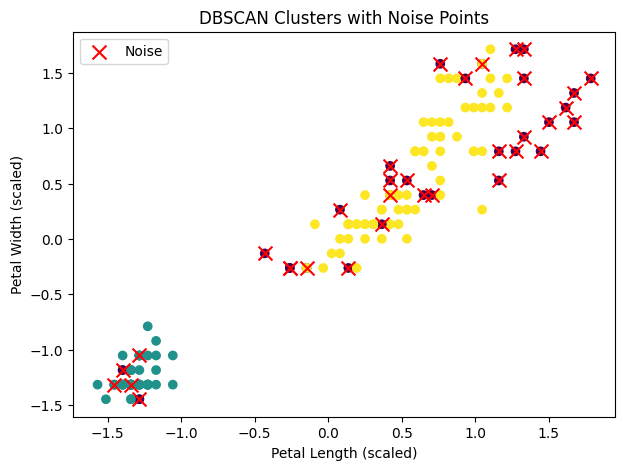

In [21]:
plt.figure(figsize=(7,5))

# Plotting clusters
plt.scatter(
    X_scaled[:, 2],   # Petal length
    X_scaled[:, 3],   # Petal width
    c=db_labels,
    cmap="viridis"
)

# Highlighting noise points
noise = db_labels == -1
plt.scatter(
    X_scaled[noise, 2],
    X_scaled[noise, 3],
    color="red",
    label="Noise",
    marker="x",
    s=100
)

plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("DBSCAN Clusters with Noise Points")
plt.legend()
plt.show()

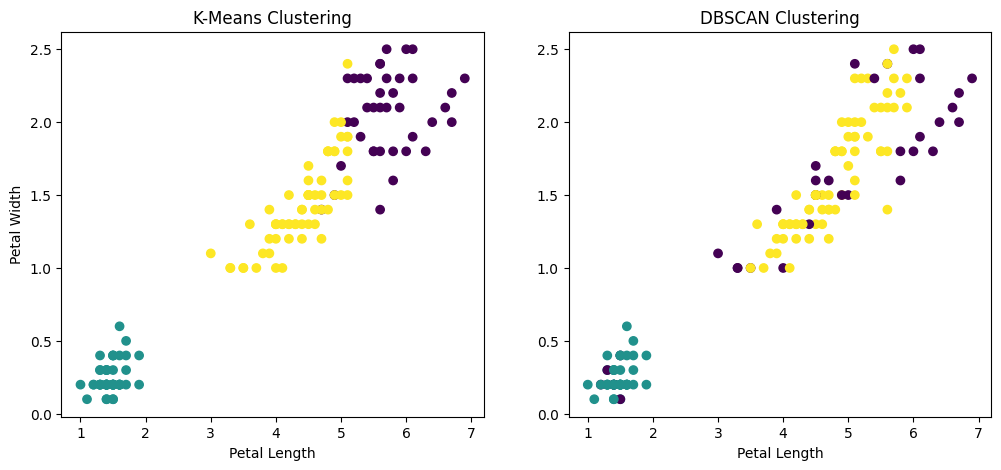

In [22]:
# Plot comparison
plt.figure(figsize=(12,5))

# K-Means clusters
plt.subplot(1,2,1)
plt.scatter(X[:,2], X[:,3], c=clusters, cmap="viridis")
plt.title("K-Means Clustering")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

# DBSCAN clusters
plt.subplot(1,2,2)
plt.scatter(X[:,2], X[:,3], c=db_labels, cmap="viridis")
plt.title("DBSCAN Clustering")
plt.xlabel("Petal Length")

plt.show()